## Convolutional Neural Networks

## Data generation

In [2]:
import random
import math
import matplotlib.pyplot as plt

In [3]:
random.seed(12345)

# step: dx, DX, bias
# P(dx) ~ exp( -|dx-bias| / DX )
# lambda

dx = lambda DX, bias: int((math.log(random.random())*DX)*2*(random.randint(0,1)-0.5)+bias)

for i in range(10):
    print(dx(50,5))

48
-4
12
-60
96
-1
33
29
56
-26


In [4]:
# pattern: amplitude a, nr of bins z

def pattern(i,z,a):
    return int(a*math.sin((math.pi*i)/z))

[0, 48, 44, 56, -4, 92, 91, 124, 153, 209, 183, 214, 314, 236, 185, 136, 424, 442, 385, 502, 522, 524, 539, 438, 519, 457, 494, 658, 722, 821, 774, 687, 909, 931, 983, 977, 1058, 1099, 890, 839, 848, 903, 937, 907, 985, 1080, 1116, 1025, 1036, 975, 845, 893, 902, 727, 818, 909, 911, 972, 999, 1027] 0
[1027, 1046, 996, 1104, 1042, 1203, 1231, 1328, 1269, 1256, 1202, 1149, 1247, 1412, 1574, 1678, 1906, 1922, 1824, 1702, 1611, 1383, 1317, 1236, 1116, 1049, 1134, 1247, 1241, 1292, 1226, 1326, 1264, 1177, 1345, 1468, 1444, 1449, 1466, 1445, 1476, 1442, 1632, 1630, 1654, 1602, 1453, 1411, 1519, 1496, 1503, 1532, 1533, 1547, 1514, 1660, 1660, 1679, 1731, 1735] 1
[1735, 1745, 1659, 1672, 1698, 1715, 1748, 1870, 1798, 1729, 1719, 1744, 1770, 1743, 1677, 1664, 1631, 1567, 1614, 1531, 1602, 1584, 1403, 1413, 1407, 1234, 1189, 1267, 1341, 1551, 1611, 1608, 1517, 1324, 1220, 1134, 1062, 1083, 1086, 1144, 1234, 1360, 1419, 1548, 1516, 1539, 1559, 1564, 1583, 1565, 1479, 1479, 1393, 1375, 1338, 1273,

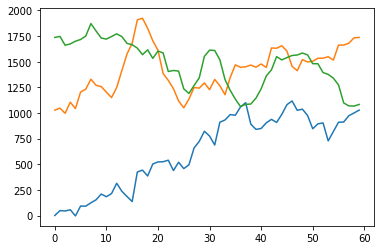

In [8]:
random.seed(12345)

# Amplitude
A = 500
# Lenght
Z = 12
# Sample length
L = 60
# Nr of data samples
N = 10000
# Step parameters
DX = 50
bias = 5

y = [0]*N
x = [[0]*L for i in range(N)]

for i in range(N):
    if i>0:
        x[i][0] = x[i-1][-1]
    for j in range(1,L):
        x[i][j] = x[i][j-1] + dx(DX,bias)
    
    y[i] = i%3
    if y[i]>0:
        j0 = random.randint(0,L-1-Z)
        sign = 3-2*y[i]
        for j in range(Z):
            x[i][j0+j] += sign*pattern(j,Z,A)

for i in range(3):
    print(x[i],y[i])
    plt.plot(x[i])
plt.show()

In [9]:
# create folder DATA
import subprocess, csv
# linux
subprocess.run(["mkdir","DATA"])

CompletedProcess(args=['mkdir', 'DATA'], returncode=0)

In [12]:
# write on csv file
str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.csv'
print(str0)

fname = 'DATA/x_' + str0
with open(fname, mode='w') as myfile:
    writer = csv.writer(myfile,delimiter=',')
    for i in range(N):
        writer.writerow(x[i])

fname = 'DATA/y_' + str0
with open(fname, mode='w') as myfile:
    writer = csv.writer(myfile,delimiter=',')
    writer.writerows(map(lambda yy: [yy], y))

ts_L60_Z12_A500_DX50_bias5_N10000.csv
